In [1]:
import pandas as pd
#Changing display options to be able to see more column width/rows
pd.options.display.max_rows = 200
pd.options.display.max_colwidth = 200
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np


In [2]:
df_preschool = pd.read_csv("CRDC2013_14_SCH.csv", low_memory = False, encoding = 'latin-1',
    na_values = [-9,-5], usecols = ['LEA_NAME', 'LEA_STATE', 'SCH_NAME', 'COMBOKEY',
    'LEAID', 'SCHID', 'CCD_LATCOD', 'CCD_LONCOD', 'JJ', 'SCH_GRADE_PS',
    'SCH_PSENR_BL_M','SCH_PSENR_BL_F', 'SCH_PSENR_HI_M', 'SCH_PSENR_HI_F',
'SCH_PSENR_AM_M','SCH_PSENR_AM_F','SCH_PSENR_AS_M','SCH_PSENR_AS_F',
'SCH_PSENR_HP_M','SCH_PSENR_HP_F','SCH_PSENR_WH_M','SCH_PSENR_WH_F',
'SCH_PSENR_TR_M','SCH_PSENR_TR_F','SCH_PSDISC_SINGOOS_HI_M',
'SCH_PSDISC_SINGOOS_HI_F','SCH_PSDISC_SINGOOS_AM_M', 'SCH_PSDISC_SINGOOS_AM_F',
       'SCH_PSDISC_SINGOOS_AS_M', 'SCH_PSDISC_SINGOOS_AS_F',
       'SCH_PSDISC_SINGOOS_HP_M', 'SCH_PSDISC_SINGOOS_HP_F',
       'SCH_PSDISC_SINGOOS_BL_M', 'SCH_PSDISC_SINGOOS_BL_F',
       'SCH_PSDISC_SINGOOS_WH_M', 'SCH_PSDISC_SINGOOS_WH_F',
       'SCH_PSDISC_SINGOOS_TR_M', 'SCH_PSDISC_SINGOOS_TR_F',
       'TOT_PSDISC_SINGOOS_M', 'TOT_PSDISC_SINGOOS_F',
       'SCH_PSDISC_MULTOOS_HI_M', 'SCH_PSDISC_MULTOOS_HI_F',
       'SCH_PSDISC_MULTOOS_AM_M', 'SCH_PSDISC_MULTOOS_AM_F',
       'SCH_PSDISC_MULTOOS_AS_M', 'SCH_PSDISC_MULTOOS_AS_F',
       'SCH_PSDISC_MULTOOS_HP_M', 'SCH_PSDISC_MULTOOS_HP_F',
       'SCH_PSDISC_MULTOOS_BL_M', 'SCH_PSDISC_MULTOOS_BL_F',
       'SCH_PSDISC_MULTOOS_WH_M', 'SCH_PSDISC_MULTOOS_WH_F',
       'SCH_PSDISC_MULTOOS_TR_M', 'SCH_PSDISC_MULTOOS_TR_F',
       'TOT_PSDISC_MULTOOS_M', 'TOT_PSDISC_MULTOOS_F',
       'SCH_PSDISC_EXP_HI_M', 'SCH_PSDISC_EXP_HI_F', 'SCH_PSDISC_EXP_AM_M',
       'SCH_PSDISC_EXP_AM_F', 'SCH_PSDISC_EXP_AS_M', 'SCH_PSDISC_EXP_AS_F',
       'SCH_PSDISC_EXP_HP_M', 'SCH_PSDISC_EXP_HP_F', 'SCH_PSDISC_EXP_BL_M',
       'SCH_PSDISC_EXP_BL_F', 'SCH_PSDISC_EXP_WH_M', 'SCH_PSDISC_EXP_WH_F',
       'SCH_PSDISC_EXP_TR_M', 'SCH_PSDISC_EXP_TR_F', 'TOT_PSDISC_EXP_M',
       'TOT_PSDISC_EXP_F', ])

# Taking a look at disciplinary actions:

- Black public preschool children are suspended from school at high rates: Black preschool children are 3.6 times as likely to receive one or more out-of-school suspensions as white preschool children.
- Black children represent 19% of preschool enrollment, but 47% of preschool children receiving one or more out-of-school suspensions; in comparison, white children represent 41% of preschool enrollment, but 28% of preschool children receiving one or more out-of-school suspensions.
- Black boys represent 19% of male preschool enrollment, but 45% of male preschool children receiving one or more out-of-school suspensions.
- Black girls represent 20% of female preschool enrollment, but 54% of female preschool children receiving one or more out-of-school suspensions.

In [3]:
#I only want the schools that have preschools, with actual children enrolled.
df_preschool = df_preschool[df_preschool['SCH_GRADE_PS'] == 'YES']
df_preschool.to_csv("df_preschool.csv")
df_preschool.dropna()

len(df_preschool)

28783

## Measuring disparity
I need to find the total enrollment:

1. percent white enrollment
    a. female
    b. male
2. percent black enrollment
    a. female
    b. male
3. other groups?


In [4]:
#To get the total preschool enrollment, adding together all the SCH_PSENR columns.
#Is there a better way to do this with this data set? :/
df_preschool['total_enrollment'] = df_preschool['SCH_PSENR_BL_M'] + df_preschool['SCH_PSENR_BL_F'] + df_preschool['SCH_PSENR_HI_M']+df_preschool['SCH_PSENR_HI_F']+df_preschool['SCH_PSENR_AM_M']+df_preschool['SCH_PSENR_AM_F']+df_preschool['SCH_PSENR_AS_M']+df_preschool['SCH_PSENR_AS_F']+df_preschool['SCH_PSENR_HP_M']+df_preschool['SCH_PSENR_HP_F']+df_preschool['SCH_PSENR_WH_M']+df_preschool['SCH_PSENR_WH_F']+df_preschool['SCH_PSENR_TR_M']+df_preschool['SCH_PSENR_TR_F']
df_preschool['total_enrollment_f'] = df_preschool['SCH_PSENR_BL_F'] + df_preschool['SCH_PSENR_HI_F']+df_preschool['SCH_PSENR_AM_F']+df_preschool['SCH_PSENR_AS_F']+df_preschool['SCH_PSENR_HP_F']+df_preschool['SCH_PSENR_WH_F']+df_preschool['SCH_PSENR_TR_F']
df_preschool['total_enrollment'].describe()

/usr/local/lib/python3.5/site-packages/numpy/lib/function_base.py:3823: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


count    28779.000000
mean        50.008270
std         67.093483
min          0.000000
25%               NaN
50%               NaN
75%               NaN
max       2471.000000
Name: total_enrollment, dtype: float64

## Calculate percent black enrollment.

In [5]:
#What percent of enrollment is black?
df_preschool['total_black_enr'] = df_preschool['SCH_PSENR_BL_M']+df_preschool['SCH_PSENR_BL_F']
df_preschool['perc_black_enr'] = df_preschool['total_black_enr']*100/df_preschool['total_enrollment']

#What percent of female enrollment is black?
df_preschool['perc_black_enr_f'] = df_preschool['SCH_PSENR_BL_F']/df_preschool['total_enrollment_f']
df_preschool['perc_black_enr_f'].mean()
df_preschool['perc_black_enr_f'].describe()
df_preschool['perc_black_enr_f'] = df_preschool['perc_black_enr_f']

df_preschool['perc_black_enr'].mean()

/usr/local/lib/python3.5/site-packages/numpy/lib/function_base.py:3823: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


17.272025052820194

## Calculate percent white enrollment.

In [6]:
#What percent of enrollment is white?
df_preschool['total_white_enr'] = df_preschool['SCH_PSENR_WH_M']+df_preschool['SCH_PSENR_WH_F']
df_preschool['perc_white_enr'] = df_preschool['total_white_enr']*100/df_preschool['total_enrollment']

#What percent of female enrollment is white female?
df_preschool['perc_white_f_enr'] = df_preschool['SCH_PSENR_WH_F']/df_preschool['total_enrollment_f']
df_preschool['perc_white_enr'].mean()

47.446722564132379

## How many kids receive disciplinary actions?
Add the totals for male and female together

In [7]:
#How many disciplines are there?
df_preschool['total_sing_oos'] = df_preschool['TOT_PSDISC_SINGOOS_F'] + df_preschool['TOT_PSDISC_SINGOOS_M']
df_preschool['total_exp'] = df_preschool['TOT_PSDISC_EXP_M'] + df_preschool['TOT_PSDISC_EXP_F']
df_preschool['total_disc'] = df_preschool['total_sing_oos'] + df_preschool['total_exp']

#How many female disciplines are there?
df_preschool['total_disc_f'] = df_preschool['TOT_PSDISC_SINGOOS_F']+df_preschool['TOT_PSDISC_EXP_F']
df_preschool['percent_disc']=df_preschool['total_disc']/df_preschool['total_enrollment']
df_preschool['percent_disc'].describe()

/usr/local/lib/python3.5/site-packages/numpy/lib/function_base.py:3823: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


count    27956.000000
mean         0.003494
std          0.023366
min          0.000000
25%               NaN
50%               NaN
75%               NaN
max          1.000000
Name: percent_disc, dtype: float64

## Out of kids receiving disciplinary actions, what percentage are black?

In [8]:
#This is to calculate total black disciplinary actions
df_preschool['total_black_single_oos'] = df_preschool['SCH_PSDISC_SINGOOS_BL_F']+df_preschool['SCH_PSDISC_SINGOOS_BL_M']
#OOPS I DISCOVERED THIS IS NOT NECESSARY, IS REDUNDANT AND RUINS EVERYTHING IF INCLUDED!
df_preschool['total_black_mult_oos'] = df_preschool['SCH_PSDISC_MULTOOS_BL_F']+df_preschool['SCH_PSDISC_MULTOOS_BL_M']
df_preschool['total_black_exp'] = df_preschool['SCH_PSDISC_EXP_BL_F']+df_preschool['SCH_PSDISC_EXP_BL_M']
df_preschool['total_black_disc'] = df_preschool['total_black_single_oos'] + df_preschool['total_black_exp']

#How many black female disciplines are there? (abs value)
df_preschool['total_black_disc_f'] = df_preschool['SCH_PSDISC_SINGOOS_BL_F'] + df_preschool['SCH_PSDISC_EXP_BL_F']

In [9]:
#Out of total disciplines, what percentage are black?
df_preschool['perc_black_disc'] = df_preschool['total_black_disc']/df_preschool['total_disc']
df_preschool['perc_black_disc'].mean()

#Out of total female disciplines, what percentage are black female?
df_preschool['perc_black_disc_f'] = df_preschool['total_black_disc_f']/df_preschool['total_disc_f']
df_preschool['perc_black_disc_f'].mean()
df_preschool['perc_black_disc'].mean()

0.43570194333497353

## What percentage are white? White female?

In [10]:
#This is to calculate total black disciplinary actions
df_preschool['total_white_single_oos'] = df_preschool['SCH_PSDISC_SINGOOS_WH_F']+df_preschool['SCH_PSDISC_SINGOOS_WH_M']
#OOPS I DISCOVERED THIS IS NOT NECESSARY, IS REDUNDANT AND RUINS EVERYTHING IF INCLUDED!
df_preschool['total_white_mult_oos'] = df_preschool['SCH_PSDISC_MULTOOS_WH_F']+df_preschool['SCH_PSDISC_MULTOOS_WH_M']
df_preschool['total_white_exp'] = df_preschool['SCH_PSDISC_EXP_WH_F']+df_preschool['SCH_PSDISC_EXP_WH_M']
df_preschool['total_white_disc'] = df_preschool['total_white_single_oos'] + df_preschool['total_white_exp']
df_preschool['total_white_f_disc']=df_preschool['SCH_PSDISC_EXP_WH_F']+df_preschool['SCH_PSDISC_SINGOOS_WH_F']

In [11]:
#What percentage of disciplines are white?
df_preschool['perc_white_disc'] = df_preschool['total_white_disc']/df_preschool['total_disc']

#What percentage of female disciplines are white?
df_preschool['perc_white_f_disc'] = df_preschool['total_white_f_disc']/df_preschool['total_disc_f']
df_preschool['perc_white_f_disc'].mean()

0.24989534275248559

In [12]:
#Divide percent discipline for demographic groups by their percent enrollment of total population.

df_preschool['perc_white_disc_enr'] = (df_preschool['total_white_disc']/df_preschool['total_white_enr'])*100
df_preschool['perc_black_disc_enr'] = (df_preschool['total_black_disc']/df_preschool['total_black_enr'])*100
df_preschool['perc_black_f_disc_enr'] = (df_preschool['total_black_disc_f']/df_preschool['SCH_PSENR_BL_F'])*100
df_preschool['perc_white_f_disc_enr'] = (df_preschool['total_white_f_disc']/df_preschool['SCH_PSENR_WH_F'])*100

In [13]:
df_heavy_handed = df_preschool[(df_preschool['percent_disc']>.03)&(df_preschool['total_enrollment']>0)]
df_not_heavy_handed=df_preschool[(df_preschool['percent_disc']<.03)&(df_preschool['total_enrollment']>0)]
bins = range(5,101,5)

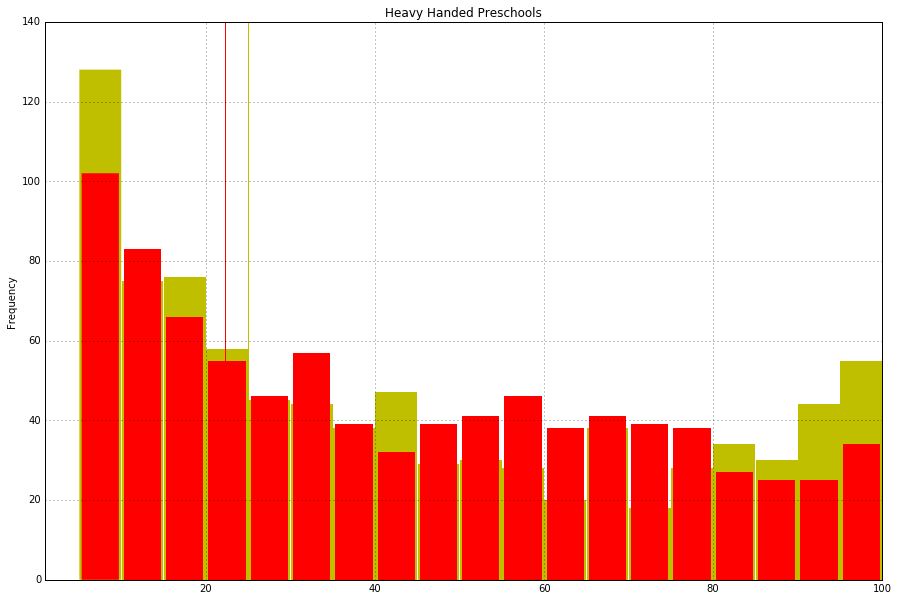

In [14]:
fig,ax=plt.subplots()
ax=df_heavy_handed['perc_black_enr'].plot(kind='hist',bins=bins,color='y',lw=0,rwidth=.99,figsize=(15,10))
df_heavy_handed['perc_white_enr'].plot(kind='hist',bins=bins,color='r',lw=0,rwidth=.88,xlim=(1,100),figsize=(15,10))
ax.set_title(label="Heavy Handed Preschools")
ax.minorticks_on()
ax.grid()
ax.axvline(x=22.2, color = 'r')
ax.axvline(x=25, color = 'y')
ax.tick_params(which= 'both', top= 'off', bottom = 'off', left = 'off', right = 'off')
plt.savefig("heavy_handed_enrollment.pdf", transparent=True)

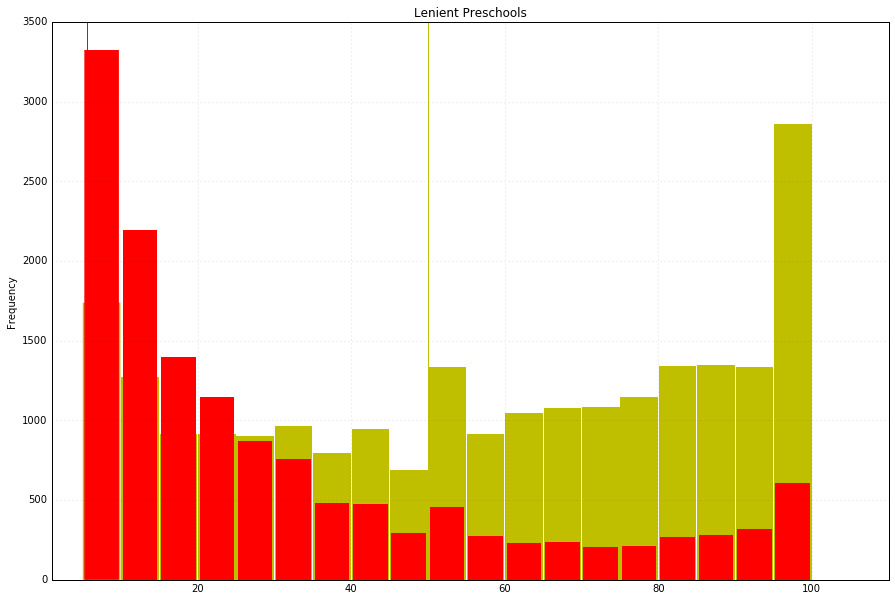

In [15]:

fig,ax=plt.subplots()
ax=df_not_heavy_handed['perc_white_enr'].plot(kind='hist',bins=bins,color='y',lw=0,rwidth=.98,xlim=(1,110),figsize=(15,10))
df_not_heavy_handed['perc_black_enr'].plot(kind='hist',bins=bins,color='r',lw=0,rwidth=.90,xlim=(1,110),ax=ax,figsize=(15,10))
ax.set_title(label="Lenient Preschools")
ax.axvline(x=5.63, color = 'r')
ax.axvline(x=50, color = 'y')
ax.grid(which='major', alpha=.25)
ax.tick_params(which= 'both', top= 'off', bottom = 'off', left = 'off', right = 'off')
plt.savefig("lenient_enrollment.pdf", transparent=True)

In [16]:
df_heavy_handed['perc_black_enr'].describe()

count    1121.000000
mean       33.515255
std        32.166272
min         0.000000
25%         6.250000
50%        22.222222
75%        57.575758
max       100.000000
Name: perc_black_enr, dtype: float64

In [17]:
df_not_heavy_handed['perc_black_enr'].describe()

count    26835.000000
mean        16.592038
std         25.021290
min          0.000000
25%          0.000000
50%          5.633803
75%         21.052632
max        100.000000
Name: perc_black_enr, dtype: float64

In [18]:
df_heavy_handed['perc_white_enr'].describe()

count    1121.000000
mean       33.877848
std        30.288618
min         0.000000
25%         6.250000
50%        25.581395
75%        58.620690
max       100.000000
Name: perc_white_enr, dtype: float64

In [19]:
df_not_heavy_handed['perc_white_enr'].describe()

count    26835.000000
mean        48.014919
std         34.718423
min          0.000000
25%         12.500000
50%         50.000000
75%         80.000000
max        100.000000
Name: perc_white_enr, dtype: float64

In [20]:
#fig, ax = plt.subplots()
#bins = range(1,100,4)
#ax = df_heavy_handed.plot(kind = 'hist',orientation='horizontal', bins=bins, y='perc_black_disc_enr', color = 'r', rwidth=.98, lw=0)
#df_heavy_handed.plot(kind = 'hist',orientation='horizontal',bins=bins,y='perc_white_disc_enr', color = 'y', rwidth=.98, lw=0, ax=ax)


28783
1121
26835


19510.0
16825.0


KeyError: 'total_am_enr'

In [ ]:
#print(df_not_heavy_handed['total_black_enr']/df_not_heavy_handed['total_enrollment'].sum())
#print(df_not_heavy_handed['total_white_enr']/df_not_heavy_handed['total_enrollment'].sum())
#print(df_not_heavy_handed['total_am_enr']/df_not_heavy_handed['total_enrollment'].sum())
#print(df_not_heavy_handed['total_hisp_enr']/df_not_heavy_handed['total_enrollment'].sum())
#print(df_not_heavy_handed['total_hp_enr']/df_not_heavy_handed['total_enrollment'].sum())
#print(df_not_heavy_handed['total_as_enr']/df_not_heavy_handed['total_enrollment'].sum())
#print(df_not_heavy_handed['total_tr_enr'].sum())
df_heavy_handed['total_enrollment'].sum()

In [ ]:
df_lenient_heavy = pd.read_csv("Heavy_Lenient.csv")
fig,ax = plt.subplots()

#df_lenient_heavy.columns = ['Hp', 'Tr', 'Am', 'As', 'Hispanic','White','Black']
df_lenient_heavy.head()
ax = df_lenient_heavy.sort(ascending=False).plot(kind='bar', stacked=True, figsize = (15,10),ylim=(0,1), lw=0)
ax.set_title(label="Disproportionality in Lenient vs. Heavy-Handed Schools")
ax.minorticks_on()
ax.tick_params(which= 'both', top= 'off', bottom = 'off', left = 'off', right = 'off')
plt.savefig("Heavy_lenient.pdf", transparent = True)

In [ ]:
fig, ax = plt.subplots()
bins = range(0,20)
ax = df_preschool_5.plot(kind = 'hist', bins=bins, orientation='horizontal',ylim =(0,10), y = 'perc_white_disc_enr', alpha = 1,  color = 'y', lw = 0)
df_preschool_5.plot(kind = 'hist', bins=bins, orientation='horizontal', y = 'perc_black_disc_enr', color = 'r', lw = 0, alpha = .5)
ax.minorticks_on()

#But turn off the ticks display
ax.tick_params(which= 'both', top= 'off', bottom = 'off', left = 'off', right = 'off')

plt.savefig("histogram2.pdf",transparent=True)

In [ ]:
fig, ax = plt.subplots()

ax = df_preschool_5.plot(kind = 'hist', y = 'perc_white_f_disc_enr', bins=bins, alpha = .2, color = 'g', ylim=(0,14), lw = 0)
df_preschool_5.plot(kind = 'hist', y = 'perc_black_f_disc_enr', color = 'b', bins=bins,lw = 0, alpha = .2)


ax.minorticks_on()
ax.tick_params(which= 'both', top= 'off', bottom = 'off', left = 'off', right = 'off')

plt.savefig("histogram.pdf",transparent=True)

In [ ]:
df_preschool['total_hisp_enr'] = df_preschool['SCH_PSENR_HI_M']+df_preschool['SCH_PSENR_HI_F']
df_preschool['total_am_enr'] = df_preschool['SCH_PSENR_AM_M']+df_preschool['SCH_PSENR_AM_F']
df_preschool['total_hp_enr'] = df_preschool['SCH_PSENR_HP_M']+df_preschool['SCH_PSENR_HP_F']
df_preschool['total_as_enr'] = df_preschool['SCH_PSENR_AS_M']+df_preschool['SCH_PSENR_AS_F']
df_preschool['total_tr_enr'] = df_preschool['SCH_PSENR_TR_M']+df_preschool['SCH_PSENR_TR_F']

#Make a bar that is total enrollment by percentage demographic groups:
#df_preschool['total_black_enr'] + df_preschool['total_white_enr] + df_preschool['total_hisp_enr'] + df_preschool['total_am_enr'] + 

In [30]:
#Female enrollment percentages by race
print(df_preschool['SCH_PSENR_HI_F'].sum()+df_preschool['SCH_PSENR_AM_F'].sum()+df_preschool['SCH_PSENR_HP_F'].sum()+df_preschool['SCH_PSENR_AS_F'].sum()+df_preschool['SCH_PSENR_TR_F'].sum()+df_preschool['SCH_PSENR_BL_F'].sum()+df_preschool['SCH_PSENR_WH_F'].sum())

664543.0


In [ ]:
#Enrollment percentages by race
print(df_preschool['total_hisp_enr'].sum()/df_preschool['total_enrollment'].sum())
print(df_preschool['total_am_enr'].sum()/df_preschool['total_enrollment'].sum())
print(df_preschool['total_hp_enr'].sum()/df_preschool['total_enrollment'].sum())
print(df_preschool['total_as_enr'].sum()/df_preschool['total_enrollment'].sum())
print(df_preschool['total_tr_enr'].sum()/df_preschool['total_enrollment'].sum())
print(df_preschool['total_black_enr'].sum()/df_preschool['total_enrollment'].sum())
print(df_preschool['total_white_enr'].sum()/df_preschool['total_enrollment'].sum())

In [25]:
#Total female disciplines by race
df_preschool['total_hp_disc_f'] = df_preschool['SCH_PSDISC_SINGOOS_HP_F']+df_preschool['SCH_PSDISC_EXP_HP_F']
df_preschool['total_am_disc_f'] = df_preschool['SCH_PSDISC_SINGOOS_AM_F']+df_preschool['SCH_PSDISC_EXP_AM_F']
df_preschool['total_as_disc_f'] = df_preschool['SCH_PSDISC_SINGOOS_AS_F']+df_preschool['SCH_PSDISC_EXP_AS_F']
df_preschool['total_tr_disc_f'] = df_preschool['SCH_PSDISC_SINGOOS_TR_F']+df_preschool['SCH_PSDISC_EXP_TR_F']
df_preschool['total_hisp_disc_f'] = df_preschool['SCH_PSDISC_SINGOOS_HI_F']+df_preschool['SCH_PSDISC_EXP_HI_F']


In [26]:
#Percentages of female disciplined students
print(df_preschool['total_hp_disc_f'].sum())
print(df_preschool['total_am_disc_f'].sum())
print(df_preschool['total_as_disc_f'].sum())
print(df_preschool['total_tr_disc_f'].sum())
print(df_preschool['total_hisp_disc_f'].sum())
print(df_preschool['total_black_disc_f'].sum())
print(df_preschool['total_white_f_disc'].sum())

4.0
21.0
4.0
38.0
199.0
575.0
277.0


In [ ]:
#Percentages of disciplined students
print(df_preschool['total_hp_disc'].sum()/df_preschool['total_disc'].sum())
print(df_preschool['total_am_disc'].sum()/df_preschool['total_disc'].sum())
print(df_preschool['total_as_disc'].sum()/df_preschool['total_disc'].sum())
print(df_preschool['total_tr_disc'].sum()/df_preschool['total_disc'].sum())
print(df_preschool['total_black_disc'].sum()/df_preschool['total_disc'].sum())
print(df_preschool['total_hisp_disc'].sum()/df_preschool['total_disc'].sum())
print(df_preschool['total_white_disc'].sum()/df_preschool['total_disc'].sum())


In [ ]:
df_dem_enr_disc = pd.read_csv("Dem_Enr_Disc.csv")
df_dem_enr_disc.head()
df_dem_enr_disc.columns = ['Hawaiian/Pacific Islander', 'Native American/Alaskan', 'Asian', 'Two or More Races', 'Black', 'Hispanic', 'White']
df_dem_enr_disc.index = ['Enrollment','Disciplinary Actions']


In [ ]:
df_dem_enr_disc.head()

NameError: name 'df_dem_enr_disc' is not defined

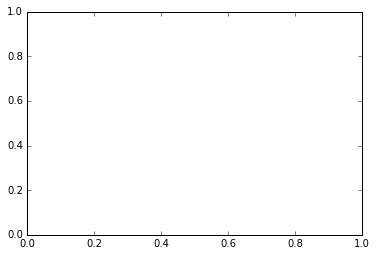

In [33]:
fig, ax = plt.subplots()
#colors = ['#247BA0', '#70C1B3', '#B2DBBF', '#F3FFBD', '#5E239D','#FF1654', '#FB5607']
colors = ['#d73027','#ffffbf','#fc8d59','#fee090','#91bfdb','#4575b4','#e0f3f8']
ax = df_dem_enr_disc.plot(kind='bar', stacked=True,figsize = (12,12), lw=0, color=colors, width = .35, legend=True)
ax.minorticks_on
ax.tick_params(which= 'both', top= 'off', bottom = 'off', left = 'off', right = 'off')

plt.savefig("stacked_enr_disc.pdf",transparent=True)


In [ ]:
df_dem_enr_disc_f = pd.read_csv("female_discipline.csv")
df_dem_enr_disc_f.head()
df_dem_enr_disc_f.columns = ['Hawaiian/Pacific Islander', 'Native American/Alaskan', 'Asian', 'Two or More Races', 'Black', 'Hispanic', 'White']
df_dem_enr_disc_f.index = ['Enrollment','Disciplinary Actions']


In [ ]:
df_dem_enr_disc_f.head()

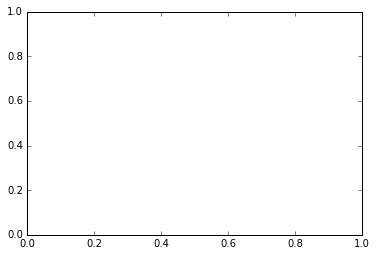

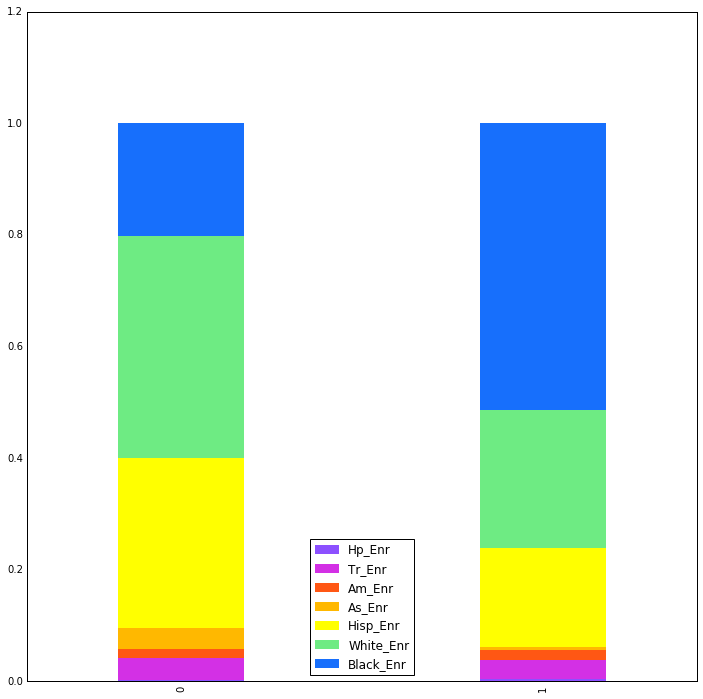

In [34]:
df_dem_enr_disc_f = pd.read_csv("femalediscsum.csv")
fig, ax = plt.subplots()

colors = ['#8C50FF','#D330E5','#FF5714','#FFB800','#FFFF00','#6EEB83','#176FFC']
ax = df_dem_enr_disc_f.plot(kind='bar', stacked=True,figsize = (12,12), lw=0, color=colors, width = .35, legend=True)
ax.minorticks_on
ax.tick_params(which= 'both', top= 'off', bottom = 'off', left = 'off', right = 'off')

plt.savefig("stacked_enr_disc_f.pdf",transparent=True)
